In [8]:
import matplotlib.pyplot as plt
import psycopg2
import pandas as pd
#Define a function to connect to the database
def connectDB():
    conn = psycopg2.connect(
        host="localhost",
        database="Database_box_office",
        user="postgres",
        password="Kip123")
    return conn

#Call the function to connect to the DB
conn = connectDB()
print("Connection successful.")

#Close connection
conn.close()
print("Connection closed.")


Connection successful.
Connection closed.


In [9]:
#Connect to the database
conn = connectDB()
print("Connection successful.")

#Make a cursor 
cur = conn.cursor()

#Run the SQL query
#This query creates categories based on the runtime
cur.execute("""SELECT
    CASE
        WHEN runtime >= 1 AND runtime <= 49 THEN 1
        WHEN runtime >= 50 AND runtime <= 98 THEN 2
        WHEN runtime >= 99 AND runtime <= 147 THEN 3
        WHEN runtime >= 148 AND runtime <= 196 THEN 4
        WHEN runtime >= 197 AND runtime <= 245 THEN 5
        WHEN runtime >= 246 AND runtime <= 294 THEN 6
        WHEN runtime >= 295 AND runtime <= 343 THEN 7
        WHEN runtime >= 344 AND runtime <= 392 THEN 8
        WHEN runtime >= 393 AND runtime <= 441 THEN 9
        WHEN runtime >= 442 AND runtime <= 490 THEN 10
        WHEN runtime >= 491 AND runtime <= 539 THEN 11
        WHEN runtime >= 540 AND runtime <= 588 THEN 12
        WHEN runtime >= 589 AND runtime <= 637 THEN 13
        WHEN runtime >= 638 AND runtime <= 686 THEN 14
        WHEN runtime >= 687 AND runtime <= 735 THEN 15
        WHEN runtime >= 736 AND runtime <= 784 THEN 16
        WHEN runtime >= 785 AND runtime <= 833 THEN 17
        WHEN runtime >= 834 AND runtime <= 882 THEN 18
        WHEN runtime >= 883 AND runtime <= 931 THEN 19
        ELSE 20
    END AS runtime_category,
    AVG(total_box_office) AS average_box_office
FROM sales
GROUP BY runtime_category
ORDER BY runtime_category;""")

#Retrieve the results
result = cur.fetchall()

#Close the cursor and the connection
cur.close()
conn.close()
print("Connection closed.")

#Put the results into a DataFrame
df = pd.DataFrame(result, columns=['runtime_category', 'average_box_office'])

#Print the results
print(df)

Connection successful.
Connection closed.
    runtime_category  average_box_office
0                  1        5.439955e+06
1                  2        9.492275e+06
2                  3        3.328136e+07
3                  4        6.462380e+07
4                  5        4.612313e+07
5                  6        8.134988e+04
6                  7        5.868368e+05
7                  8        9.823283e+05
8                  9        1.624580e+05
9                 10        0.000000e+00
10                16        3.699395e+05
11                17        1.520000e+03
12                20        2.696544e+06


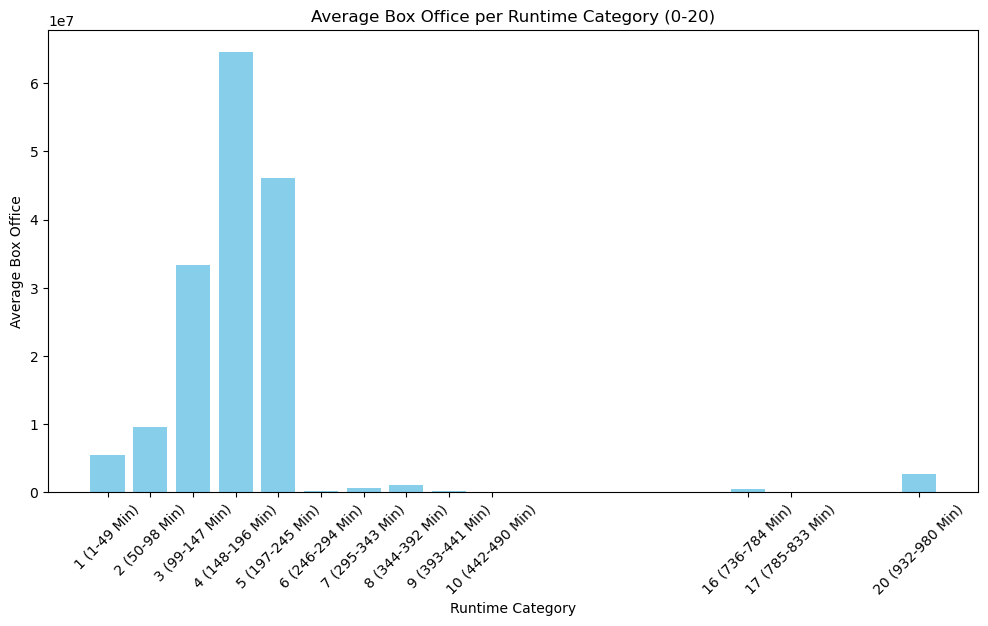

In [10]:
#Create a bar chart
plt.figure(figsize=(12, 6)) 
plt.bar(df['runtime_category'], df['average_box_office'], color='skyblue')

#Add titles and labels
plt.title('Average Box Office per Runtime Category (0-20)')
plt.xlabel('Runtime Category')
plt.ylabel('Average Box Office')

#Set the x-axis labels in a chart based on the data in the 'Runtime_category' column of the DataFrame 'df'."
xtick_labels = [f"{i} ({(i-1)*49+1}-{i*49} Min)" for i in df['runtime_category']]
plt.xticks(df['runtime_category'], xtick_labels, rotation=45)

#Show the chart
plt.show()
